In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 

%matplotlib inline
pd.set_option('display.max_columns', 500)
warnings.filterwarnings(action='ignore')

# 1. Data Load

In [2]:
data = pd.read_csv('data/Classification_bank_loan_modelling/Bank_Personal_Loan_Modelling.csv')

In [3]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


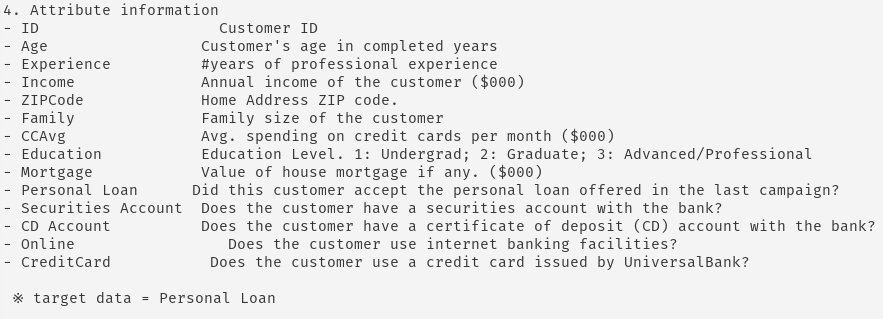

In [5]:
from IPython.display import Image
Image('image/features.png')

**Null 값은 따로 존재하지 않고, 모두 int 또는 flaot 타입**

In [6]:
#check columns unique value
columns = data.columns
    
for col in columns :
    print("{0}'s unique values are {1}".format(col, np.unique(data[col])))
    print('-----------------------------------------------------------------------------------------------')

ID's unique values are [   1    2    3 ... 4998 4999 5000]
-----------------------------------------------------------------------------------------------
Age's unique values are [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67]
-----------------------------------------------------------------------------------------------
Experience's unique values are [-3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
-----------------------------------------------------------------------------------------------
Income's unique values are [  8   9  10  11  12  13  14  15  18  19  20  21  22  23  24  25  28  29
  30  31  32  33  34  35  38  39  40  41  42  43  44  45  48  49  50  51
  52  53  54  55  58  59  60  61  62  63  64  65  68  69  70  71  72  73
  74  75  78  79  80  81  82  83  84  85  88  89  90  91  92  93  94  

**ZIP code는 bank loan에 큰 영향을 미치지 않는것으로 판단되어 column삭제**  

In [7]:
data = data.drop(['ZIP Code'], axis=1)

In [8]:
X = data.loc[:, data.columns!='Personal Loan']
y = data.loc[:, data.columns=='Personal Loan']

In [9]:
## y의 name 
target_att = 'Personal Loan'

## x의 name
in_feature = list(data.columns [data.columns != target_att])

## data column 중 categorical variable 찾기
cate_col = [col for col in in_feature if not np.issubdtype(X[col].dtype, np.number)]

## X의 string 값을 dummey variable로 변환 
X_dummies= pd.get_dummies(X.loc[:,in_feature], columns=cate_col)
feature_names = X_dummies.columns

## y의 string 값을 numeric으로 변환 
y, class_names = pd.factorize(data[target_att])

from sklearn.model_selection import train_test_split  
## train, test = 8:2, random split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, )

# 2. 분석 

### module import

In [10]:
import os
os.chdir(r"./tree_gain_ratio")
workingdir = os.path.join(os.getcwd(), '.')
os.chdir(os.path.join(workingdir, 'modules' )) 

In [11]:
os.getcwd()

'/home/inno/Study/Data_mining/project/tree_gain_ratio/modules'

In [12]:
# entropy_gain을 구하기 위한 .py파일 
from usertree import userTree as utr
import utils

### 파라미터 설정 및 데이터 split

In [13]:
# DT termination criteria #
## MAX_DEPTH: 기존 모델의 max_depth와 같음
## min_samples_leaf: 기존모델의 min_samples_leaf와 같음
# -> MAX_DEPTH는 변경불가 
MAX_DEPTH = 1000

sample_ratio = 0.03
min_sample_leaf = round(sample_ratio * len(X_train))

# data를 data frame형태로 train, test로 나눔
train_idx, test_idx = X_train.index, X_test.index
train, test = data.loc[train_idx,:], data.loc[test_idx,:]

In [14]:
train = train.sort_index()

#  실제 데이터의 class별 각 갯수 #
## original y의 class 수 ##

# data y의 이름을 넣으면 됌 #
uni_class = np.unique(data['Personal Loan'])

class_number = {}
for i in uni_class:    
    class_number[i] = len(data[data['Personal Loan'] == i])
    
class_number

{0: 4520, 1: 480}

In [15]:
# 실제 train 데이터의 class별 각 갯수 #

# data의 y의 이름을 넣으면 됌 #
tra_uni_class = np.unique(train['Personal Loan'])
tra_class_number = {}
for i in tra_uni_class:    
    tra_class_number[i] = len(train[train['Personal Loan'] == i])
    
tra_class_number

{0: 3619, 1: 381}

### 모델 생성 ###
> min sample leaf, max depth, params(entropy, gini, entropy_GR 중 하나) 순으로 알맞게 넣음


In [16]:
# 모델 생성 #
## min_samples_leaf: 노드의 최소 데이터 수
## MAX_DEPTH: 나무의 가지 수
## params: 분기기준 -> entropy, gini, entropy_GR 총 3개 사용가능
## simplify: 각 어떤 노드를 기준으로 child node로 분기 했을 때 child node의 분기 예측값이 같다면 분기하지않고 이전 노드를 유지함

#CART_entropy_ins = utr(min_sample_leaf, MAX_DEPTH, params ='entropy', simplify=True)
CART_gini_ins = utr(min_sample_leaf, MAX_DEPTH, params ='gini', simplify=True)
#CART_entropy_GR_ins = utr(min_sample_leaf, MAX_DEPTH, params ='entropy_GR', simplify=True)

### 모델 피팅 ###
> train data와 data의 target 이름을 각각 넣음

In [17]:
# 모델 피팅 # 
## train: dataframe형태로 된 data
## target_attribute_name: target data로 설정된 y값 이름
gini_tree, gini_pprint_tree = CART_gini_ins.fit(train, target_attribute_name = "Personal Loan")  

In [18]:
## CART_entropy_GR_tree: tree에서 분리된 노드들의 분기기준과 data의 index, target(=class)가 출력 -> 성능측정용
## CART_entropy_GR_graph_tree: tree 그래프를 생성하기 위한 값 저장 
CART_gini_tree, CART_gini_graph_tree = CART_gini_ins.tree, CART_gini_ins.graph_tree   

In [19]:
## utils.get_usrt_info 코드 설명 ##
# train: data의 train data
# CART_gini_tree: tree에서 분리된 노드들의 분기기준과 data의 index, target(=class)가 출력 -> 성능측정용
# target_att: data의 y이름

tree_data = utils.get_usrt_info(train ,CART_gini_tree, target_att = "Personal Loan")

class prior: [0.90475, 0.09525]
leaf node별 class수: [3150, 67]
leaf node별 class수: [454, 59]
leaf node별 class수: [15, 255]


In [20]:
tree_data = tree_data[['depth', 'lift', 'coverage', 'homogeneity', 'pred', 'number_of_variable']]

In [21]:
CART_gini_graph_tree

{'[label="Income < 113.5\\nsamples = 4000\\nsamples/class = [3619, 381]"] ;': '[label="predict = 0\\nhomogeneity = 0.979\\ncoverage = 0.804\\nsamples/class = [3150, 67]"] ;',
 '[label="Income >= 113.5\\nsamples = 4000\\nsamples/class = [3619, 381]"] ;': {'[label="Education < 1.5\\nsamples = 783\\nsamples/class = [469, 314]"] ;': '[label="predict = 0\\nhomogeneity = 0.885\\ncoverage = 0.128\\nsamples/class = [454, 59]"] ;',
  '[label="Education >= 1.5\\nsamples = 783\\nsamples/class = [469, 314]"] ;': '[label="predict = 1\\nhomogeneity = 0.944\\ncoverage = 0.068\\nsamples/class = [15, 255]"] ;'}}

### 그래프 생성 ###
> CART_gini_ins.graph.tree_to_graph에 CART_gini_graph_tree를 넣고 node와 edge에 대한 데이터를 생성한 뒤, \
> node와 edge에 "\n"을 덫붙여서 tree graph를 생성함.

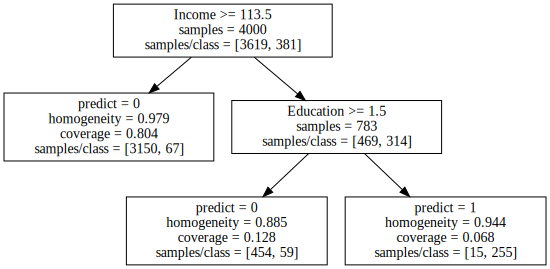

In [22]:
import graphviz
graph_dir = 'graph'
node, edge = CART_gini_ins.graph.tree_to_graph(CART_gini_graph_tree)
tree_graph = graphviz.Source(node + edge+'\n}')
tree_graph

# 유의사항: 왼쪽 화살표가 False, 오른쪽 화살표가 True임

In [23]:
# PDF 파일 출력 #
graph_dir = 'image'
csv_dir = 'csv'
split = 'gini'
count = 30

tree_graph.render('{0}/{1}/{2}_graph_{1}'.format(graph_dir, split, count, split))
tree_data.to_csv('{0}/{1}/{2}_csv_{1}.csv'.format(csv_dir, split, count, split))

## 성능 측정 ##
> CART_gini_ins.predict에 Dataframe형태의 x,y가 동시에 존재하는 train or test data와 이전에 선언한 CART_entropy_GR_tree를 넣으면, \
> predict, predict probability가 각각 생성됨 

In [24]:
# 성능측정 #
## train predict ##
train_CART_gini_all_pred, train_CART_gini_all_pred_prob = CART_gini_ins.predict(train, CART_gini_tree)

## test predict ## 
test_CART_gini_all_pred, test_CART_gini_all_pred_prob = CART_gini_ins.predict(test, CART_gini_tree)

In [25]:
# y의 name 넣기 
classes = np.unique(train['Personal Loan'])

# perform_check에 순서대로 train set의 y, train_CART_entropy_GR_all_pred, 
train_CART_gini_all_met = utils.perform_check(train['Personal Loan'], \
         train_CART_gini_all_pred, \
         train_CART_gini_all_pred_prob,\
         len(classes), CART_gini_ins.CLASS_DICT_)

# 
test_CART_gini_all_met = utils.perform_check(test['Personal Loan'], \
         test_CART_gini_all_pred, \
         test_CART_gini_all_pred_prob, \
         len(classes), CART_gini_ins.CLASS_DICT_)

In [26]:
# [accuracy, recall, precision, f1, auc] 순
train_CART_gini_all_met

[0.96475,
 0.6692913385826772,
 0.9444444444444444,
 0.7834101382488481,
 0.8889366343713806]

In [27]:
# [accuracy, recall, precision, f1, auc] 순
test_CART_gini_all_met

[0.971,
 0.7272727272727273,
 0.972972972972973,
 0.8323699421965318,
 0.8959685646700075]

### [accuracy, recall, precision, f1, auc] 순

In [28]:
perform_base_str = '{} : ACCURACY :{}, RECALL :{}, PRECISION : {}, F1 : {}, AUC : {}'
print(perform_base_str.format('\nMetric\n ', \
            *np.round(np.array(train_CART_gini_all_met), 3)))


Metric
  : ACCURACY :0.965, RECALL :0.669, PRECISION : 0.944, F1 : 0.783, AUC : 0.889


In [29]:
perform_base_str = '{} : ACCURACY :{}, RECALL :{}, PRECISION : {}, F1 : {}, AUC : {}'
print(perform_base_str.format('\nMetric\n ', \
            *np.round(np.array(test_CART_gini_all_met), 3)))


Metric
  : ACCURACY :0.971, RECALL :0.727, PRECISION : 0.973, F1 : 0.832, AUC : 0.896
